## Name: Riad Mohammed
## Class: Database Systems

1. Provide evidence to show that AWS RDS was setup correctly.

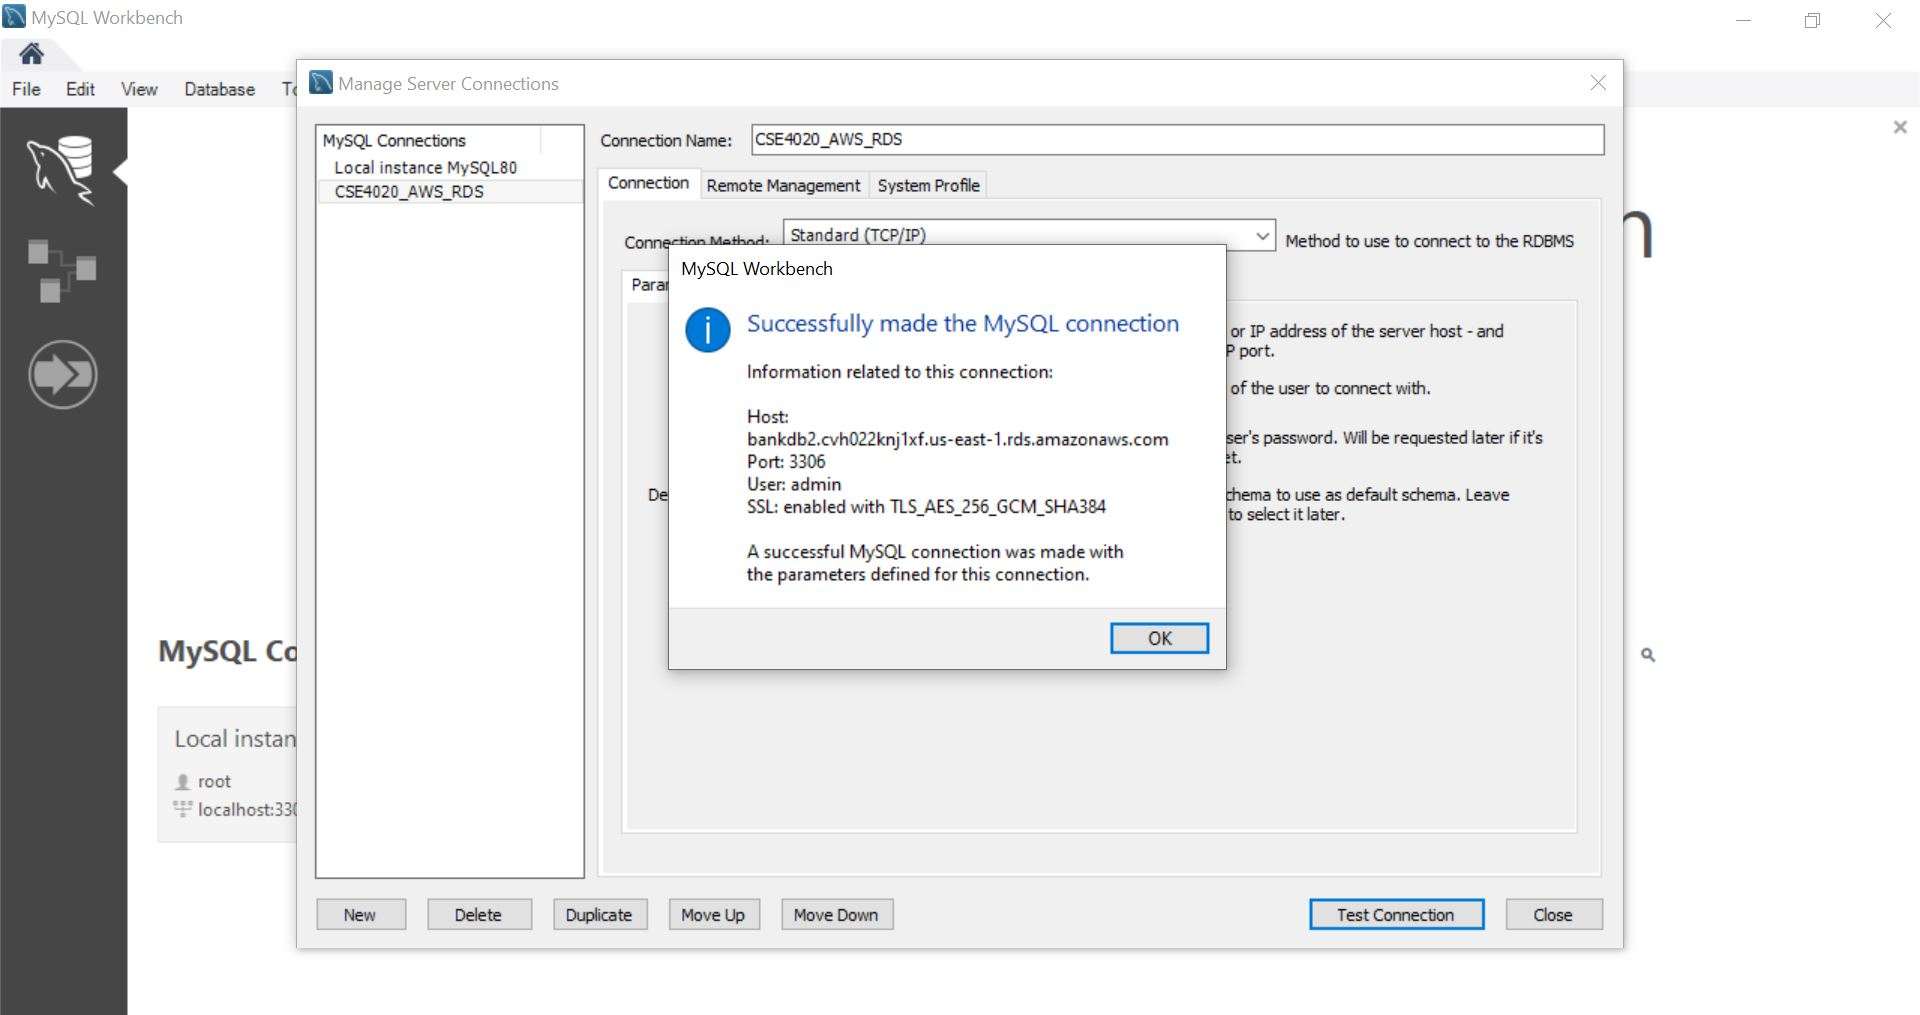

In [1]:
#pip install mysql-connector-python
import mysql.connector

    

In [2]:
def main():
    host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
    user = 'admin'
    password = "Kisscake12!"
    conn = mysql.connector.connect(host=host,user=user,password=password)
   
    print(conn.is_connected())
    

In [3]:
main()

True


2.Create a DDL file based on the following schema diagram (You may use dbdiagram.io as demonstrated in
class or you may create the tables manually). Add integrity constraints to your DDL that ensures that the balance in
the account table and the amount in the loan table cannot be negative.


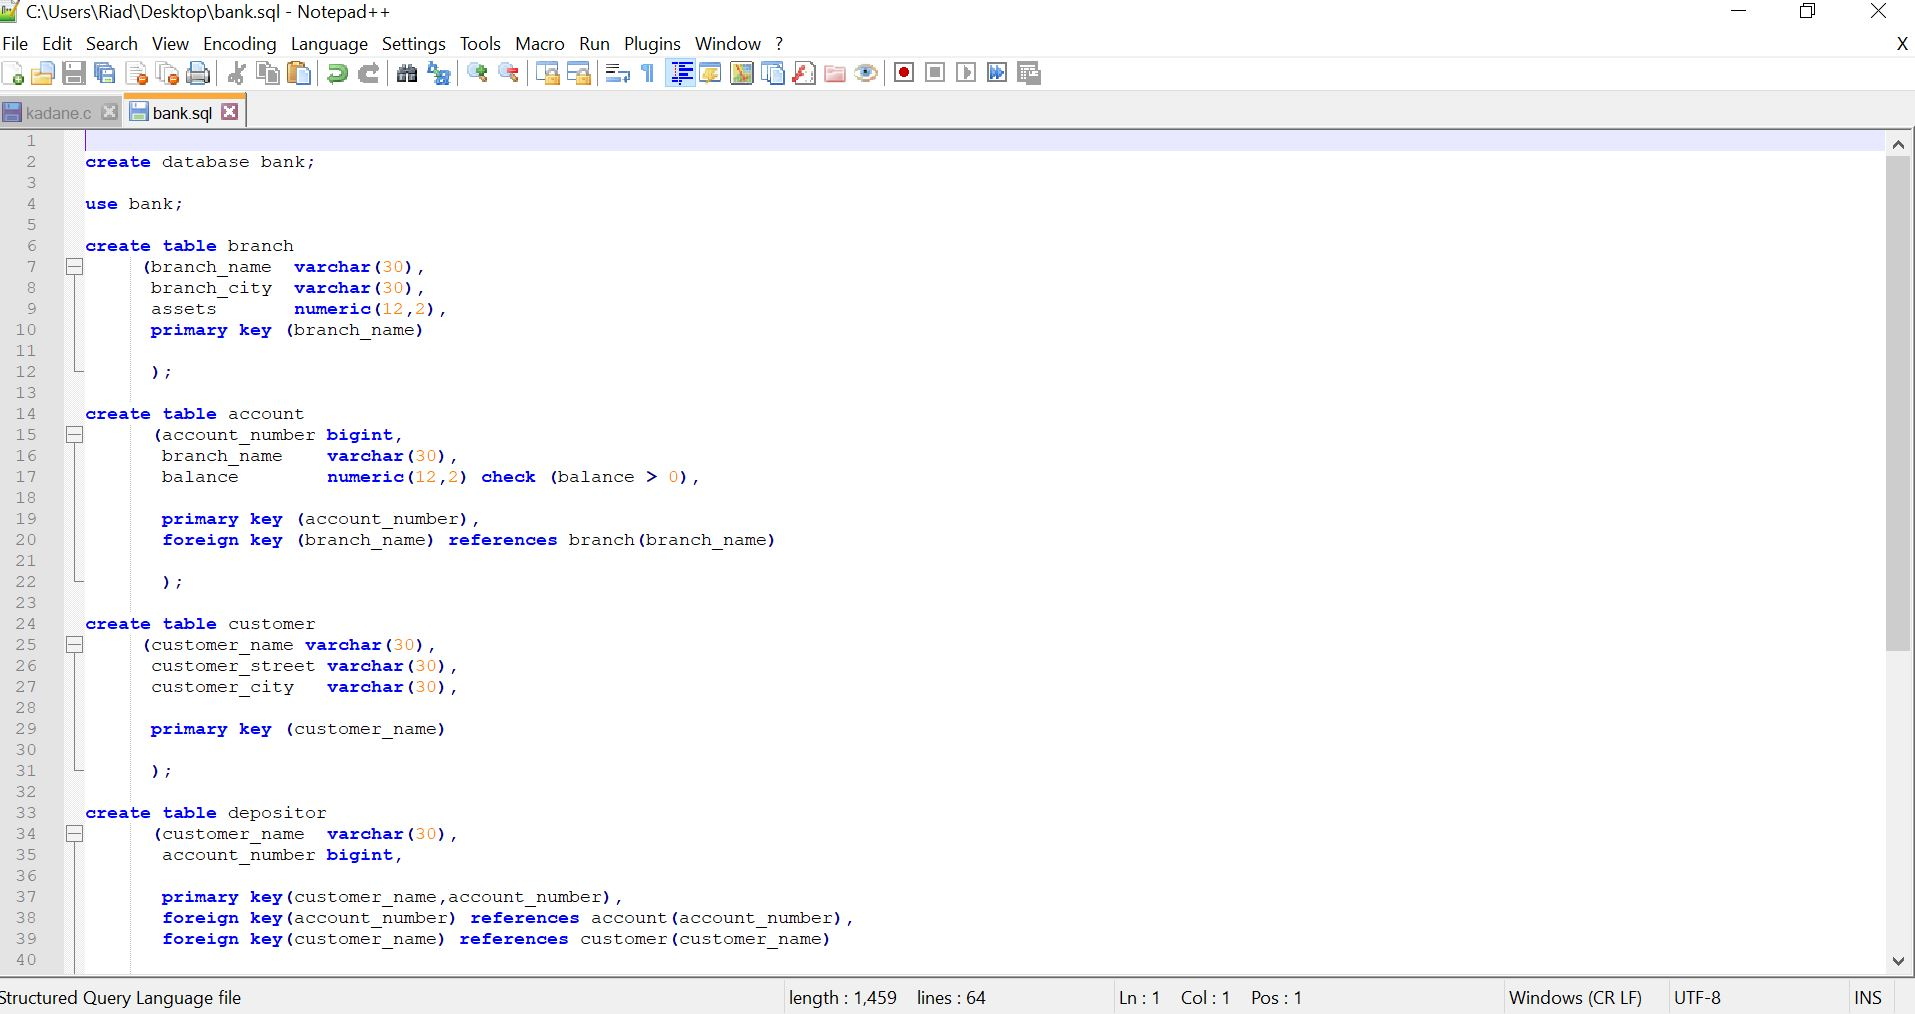

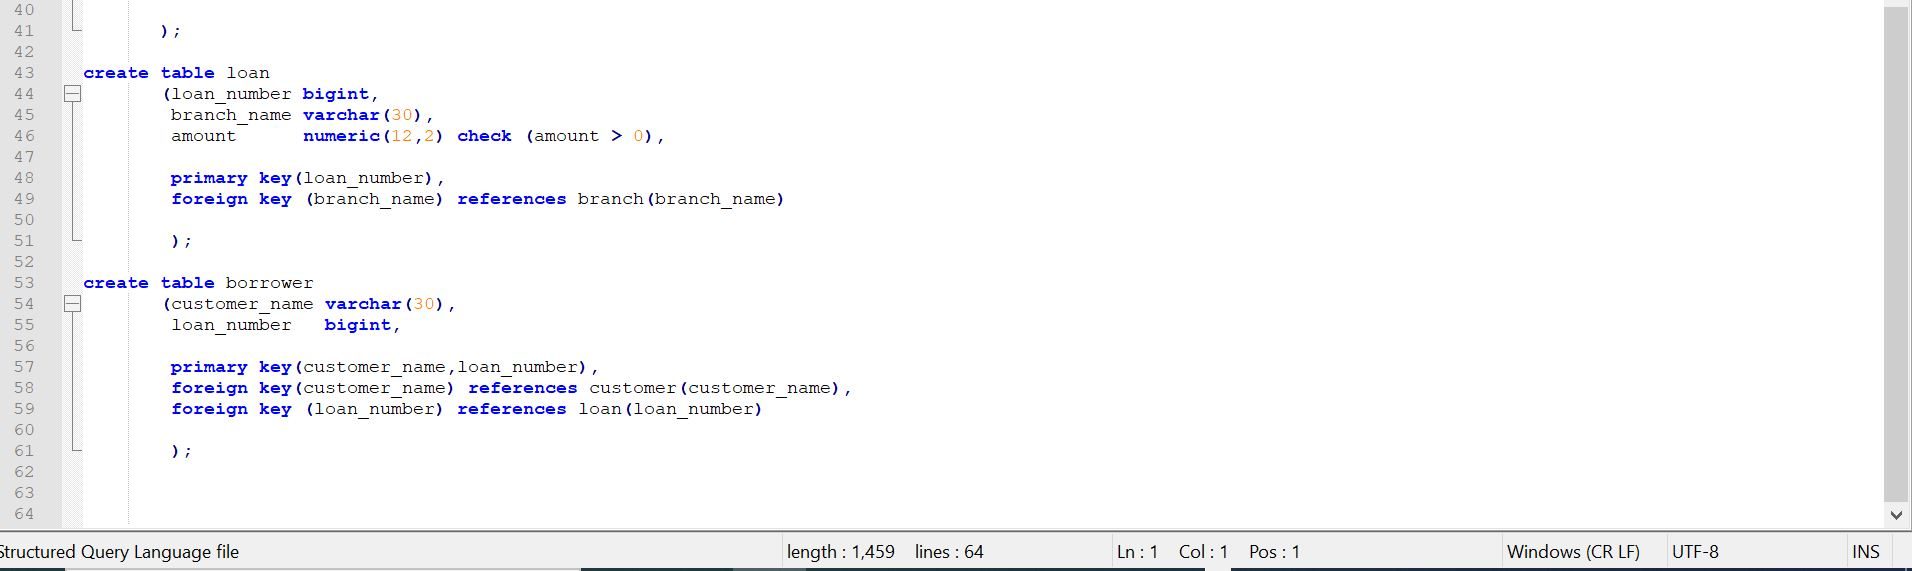

3.In a Jupyter Notebook, write code either in Python, Java or C that connects to your AWS RDS instance
and creates each of the tables in your DDL file.

Note this code was taken from Dr Fitzroy slides and modified accordingly 

In [49]:
import mysql.connector

In [50]:
def batch_execute_ddl(conn):
    cursor = conn.cursor()
    ddl_file = open("bank_act2.sql")
    sql = ddl_file.read()
    
    for result in cursor.execute(sql, multi=True):
        if result.with_rows:
            print(f"Rows produced: {result.statement}")
            print(result.fetchall())
        else:
            print(f"number of rows affetced by statement {result.statement}:{result.rowcount}")
    
    conn.close()

In [51]:
def main():
    host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
    user = 'admin'
    password = "Kisscake12!"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    
    batch_execute_ddl(conn)

main()

number of rows affetced by statement create database bank:1
number of rows affetced by statement use bank:0
number of rows affetced by statement create table branch
     (branch_name  varchar(100),
	  branch_city  varchar(100),
	  assets       numeric(12,2),
	  primary key (branch_name)
	  
	  ):0
number of rows affetced by statement create table account
      (account_number varchar(50),
	   branch_name    varchar(100),
	   balance        numeric(12,2) check (balance > 0),
	   
	   primary key (account_number),
	   foreign key (branch_name) references branch(branch_name)
	   
	   ):0
number of rows affetced by statement create table customer
     (customer_name varchar(50),
	  customer_street varchar(100), 
	  customer_city   varchar(100),
	  
	  primary key (customer_name)
	  
	  ):0
number of rows affetced by statement create table depositor
      (customer_name  varchar(50),
	   account_number varchar(50),
	   
	   primary key(customer_name,account_number),
	   foreign key(account_

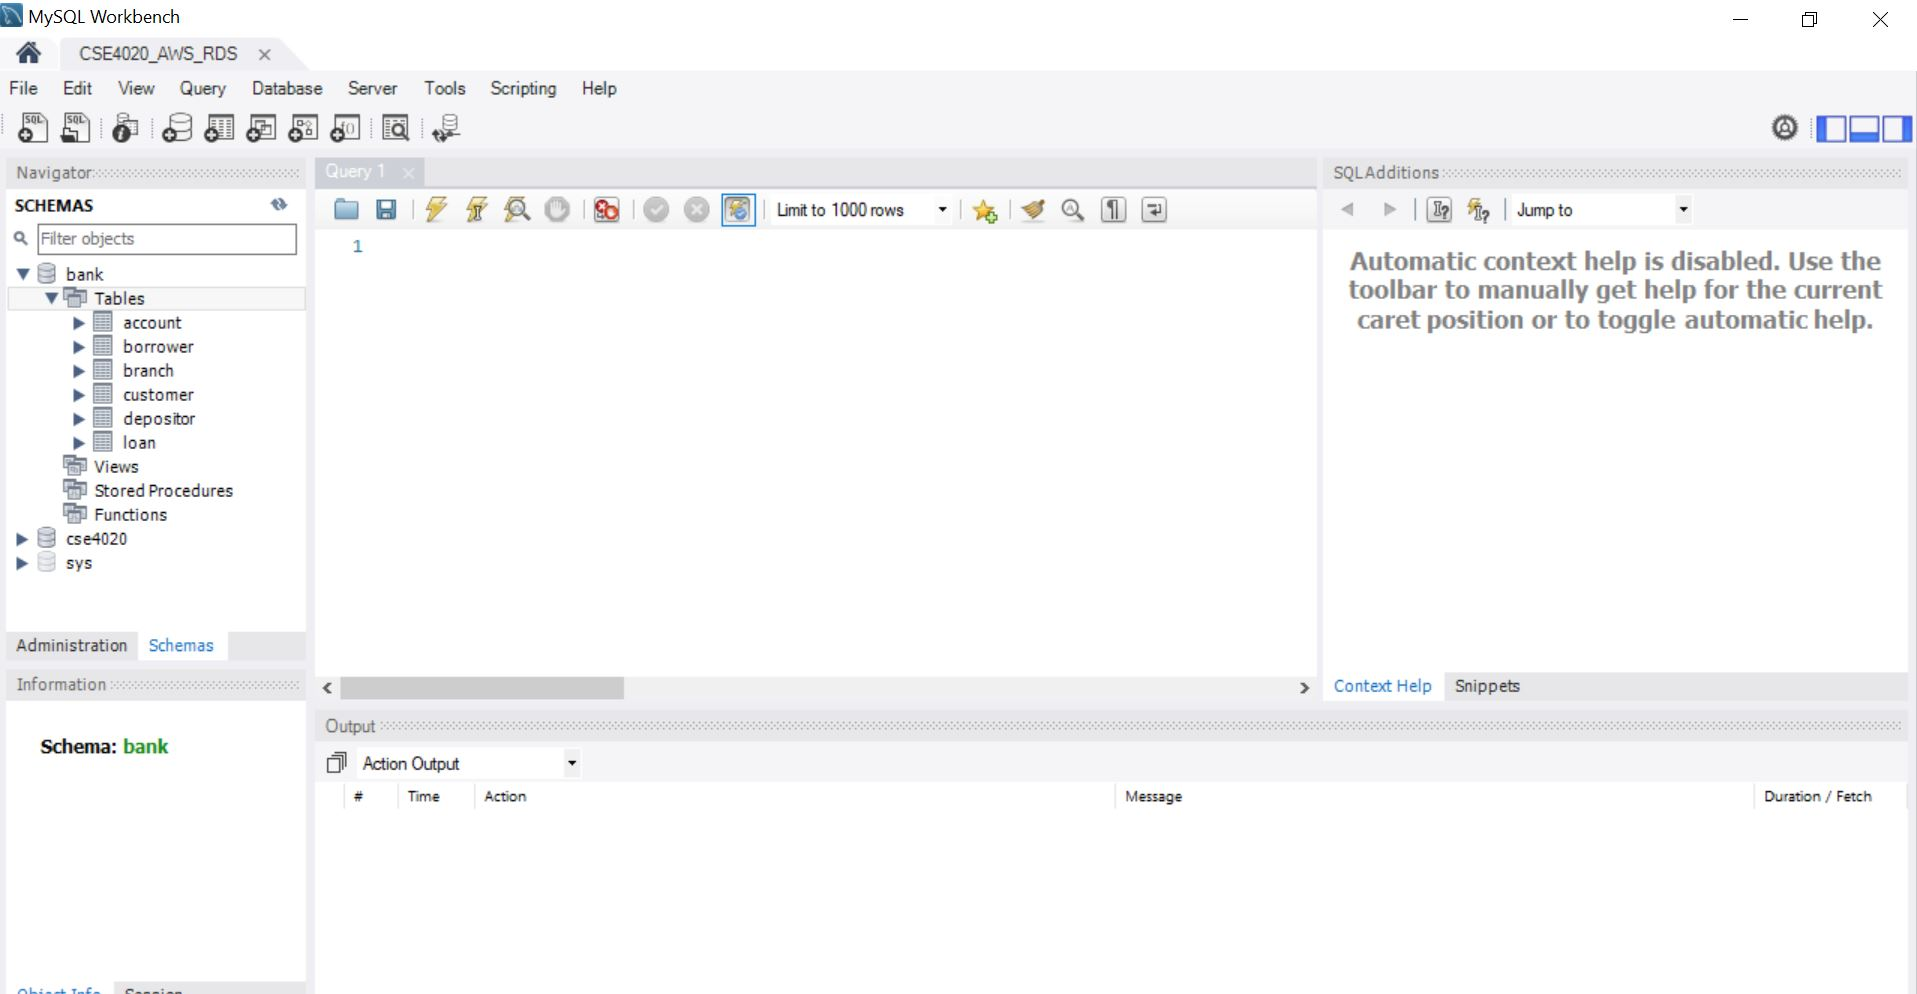

4.Verify that your tables were created by using code to issue the following command for each table in your
list.


In [18]:
import mysql.connector
from IPython.display import display,Markdown

def batch_execute_ddl(conn):
    cursor = conn.cursor()
    ddl_file = open("bank.sql")
    sql = ddl_file.read()
    
    cursor.execute("USE bank")
    cursor.execute("SHOW tables ")
    table_names=cursor.fetchall()
    
    for name in table_names:
        cursor.execute(f"SHOW CREATE TABLE {name[0]}")
        name=cursor.fetchall() 
        print(name)
        display(Markdown(f" {name}"))
            
def main():
    host = 'bankdb2.cvh022knj1xf.us-east-1.rds.amazonaws.com'
    user = 'admin'
    password = "Kisscake12!"
    conn = mysql.connector.connect(host=host,user=user,password=password)
    
    batch_execute_ddl(conn)

main()

[('account', 'CREATE TABLE `account` (\n  `account_number` bigint NOT NULL,\n  `branch_name` varchar(30) DEFAULT NULL,\n  `balance` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`account_number`),\n  KEY `branch_name` (`branch_name`),\n  CONSTRAINT `account_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),\n  CONSTRAINT `account_chk_1` CHECK ((`balance` > 0))\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('account', 'CREATE TABLE `account` (\n  `account_number` bigint NOT NULL,\n  `branch_name` varchar(30) DEFAULT NULL,\n  `balance` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`account_number`),\n  KEY `branch_name` (`branch_name`),\n  CONSTRAINT `account_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),\n  CONSTRAINT `account_chk_1` CHECK ((`balance` > 0))\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

[('borrower', 'CREATE TABLE `borrower` (\n  `customer_name` varchar(30) NOT NULL,\n  `loan_number` bigint NOT NULL,\n  PRIMARY KEY (`customer_name`,`loan_number`),\n  KEY `loan_number` (`loan_number`),\n  CONSTRAINT `borrower_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`),\n  CONSTRAINT `borrower_ibfk_2` FOREIGN KEY (`loan_number`) REFERENCES `loan` (`loan_number`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('borrower', 'CREATE TABLE `borrower` (\n  `customer_name` varchar(30) NOT NULL,\n  `loan_number` bigint NOT NULL,\n  PRIMARY KEY (`customer_name`,`loan_number`),\n  KEY `loan_number` (`loan_number`),\n  CONSTRAINT `borrower_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`),\n  CONSTRAINT `borrower_ibfk_2` FOREIGN KEY (`loan_number`) REFERENCES `loan` (`loan_number`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

[('branch', 'CREATE TABLE `branch` (\n  `branch_name` varchar(30) NOT NULL,\n  `branch_city` varchar(30) DEFAULT NULL,\n  `assets` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`branch_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('branch', 'CREATE TABLE `branch` (\n  `branch_name` varchar(30) NOT NULL,\n  `branch_city` varchar(30) DEFAULT NULL,\n  `assets` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`branch_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

[('customer', 'CREATE TABLE `customer` (\n  `customer_name` varchar(30) NOT NULL,\n  `customer_street` varchar(30) DEFAULT NULL,\n  `customer_city` varchar(30) DEFAULT NULL,\n  PRIMARY KEY (`customer_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('customer', 'CREATE TABLE `customer` (\n  `customer_name` varchar(30) NOT NULL,\n  `customer_street` varchar(30) DEFAULT NULL,\n  `customer_city` varchar(30) DEFAULT NULL,\n  PRIMARY KEY (`customer_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

[('depositor', 'CREATE TABLE `depositor` (\n  `customer_name` varchar(30) NOT NULL,\n  `account_number` bigint NOT NULL,\n  PRIMARY KEY (`customer_name`,`account_number`),\n  KEY `account_number` (`account_number`),\n  CONSTRAINT `depositor_ibfk_1` FOREIGN KEY (`account_number`) REFERENCES `account` (`account_number`),\n  CONSTRAINT `depositor_ibfk_2` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('depositor', 'CREATE TABLE `depositor` (\n  `customer_name` varchar(30) NOT NULL,\n  `account_number` bigint NOT NULL,\n  PRIMARY KEY (`customer_name`,`account_number`),\n  KEY `account_number` (`account_number`),\n  CONSTRAINT `depositor_ibfk_1` FOREIGN KEY (`account_number`) REFERENCES `account` (`account_number`),\n  CONSTRAINT `depositor_ibfk_2` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`)\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]

[('loan', 'CREATE TABLE `loan` (\n  `loan_number` bigint NOT NULL,\n  `branch_name` varchar(30) DEFAULT NULL,\n  `amount` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`loan_number`),\n  KEY `branch_name` (`branch_name`),\n  CONSTRAINT `loan_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),\n  CONSTRAINT `loan_chk_1` CHECK ((`amount` > 0))\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]


 [('loan', 'CREATE TABLE `loan` (\n  `loan_number` bigint NOT NULL,\n  `branch_name` varchar(30) DEFAULT NULL,\n  `amount` decimal(12,2) DEFAULT NULL,\n  PRIMARY KEY (`loan_number`),\n  KEY `branch_name` (`branch_name`),\n  CONSTRAINT `loan_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),\n  CONSTRAINT `loan_chk_1` CHECK ((`amount` > 0))\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci')]